# DBSCAN

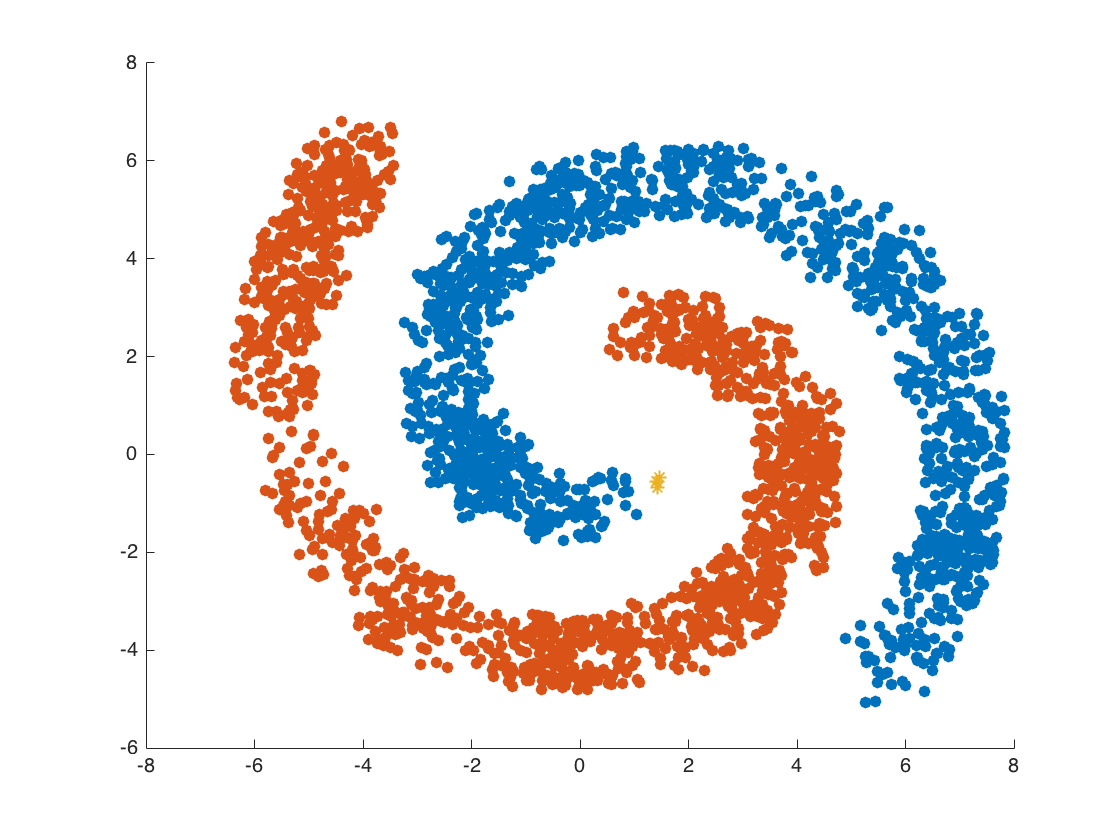

## Load Data

Data yang akan digunakan dalam sesi ini adalah data pemain di FIFA20, yang dapat diakses melalui link berikut https://www.kaggle.com/importdata/dbscan-grouping-players/data?select=players_20.csv

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv("players_20.csv")

df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

df = df[df.overall > 86] # extracting players with overall above 86

df = df.fillna(df.mean())

names = df.short_name.tolist() # saving names for later

df = df.drop(['short_name'], axis = 1) # drop the short_name column
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


### Standardizing Data

In [10]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)
X_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,1.000000,0.300000,0.25,0.358543,0.833333,0.984615,1.000000,1.000000,0.120690,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.939024,1.000000,0.731707,1.000000,0.974684,1.000000,1.000000,1.000000,1.000000,1.0000,0.913793,0.781818,0.949153,0.933333,1.000000,0.795455,0.584615,0.661538,0.517857,1.000000,0.367647,0.358025,0.988235,1.000000,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,0.385520,0.200000,0.50,0.285714,0.888889,1.000000,0.736842,0.805556,0.051724,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,0.890244,0.988235,0.963415,0.854839,0.962025,0.908046,0.853659,0.785714,0.741379,0.9500,0.879310,0.909091,0.847458,1.000000,0.600000,1.000000,1.000000,0.815385,0.696429,0.988095,0.588235,0.222222,1.000000,0.812500,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,0.996287,0.300000,0.50,0.428571,0.907407,0.876923,0.868421,0.972222,0.000000,0.261905,0.5,0.372727,0.48,0.44,0.522222,0.550,0.926829,0.905882,0.634146,0.919355,0.962025,0.988506,0.939024,0.916667,0.810345,0.9875,0.965517,0.872727,1.000000,0.733333,0.816667,0.659091,0.476923,0.753846,0.178571,0.880952,0.411765,0.308642,0.905882,0.937500,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,0.807550,0.400000,0.75,0.000000,0.620165,0.717949,0.653801,0.610494,0.505747,0.637566,0.4,1.000000,0.40,0.40,0.388889,1.000,0.024390,0.011765,0.060976,0.209677,0.025316,0.022989,0.024390,0.047619,0.103448,0.1750,0.086207,0.345455,0.508475,0.466667,0.233333,0.181818,0.738462,0.138462,0.696429,0.023810,0.161765,0.098765,0.011765,0.546875,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,0.930074,0.200000,1.00,0.428571,0.907407,0.846154,0.842105,0.944444,0.051724,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.853659,0.870588,0.621951,0.951613,0.911392,0.977011,0.878049,0.821429,0.844828,0.9750,0.965517,0.854545,0.983051,0.600000,0.983333,0.704545,0.400000,0.800000,0.428571,0.833333,0.455882,0.370370,0.905882,0.921875,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,0.818688,0.533333,0.75,0.285714,0.629630,0.892308,1.000000,0.722222,0.500000,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,1.000000,0.847059,0.548780,1.000000,0.898734,0.873563,0.902439,0.869048,0.982759,0.9375,0.672414,0.636364,0.694915,0.666667,0.683333,0.909091,0.507692,0.876923,0.625000,0.952381,0.779412,0.617284,0.917647,1.000000,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.032967,0.069767,0.112360
6,0.500000,0.666667,0.702703,0.428571,0.750,0.563218,0.307692,0.333333,0.75,0.00,0.675743,0.000000,0.50,1.000000,0.620165,0.717949,0.653801,0.610494,0.505747,0.637566,0.6,0.363636,0.80,0.60,0.000000,0.750,0.085366,0.047059,0.012195,0.500000,0.037975,0.126437,0.085366,0.023810,0.500000,0.1750,0.000000,0.163636,0.000000,0.333333,0.133333,0.340909,0.753846,0.046154,0.696429,0.000000,0.294118,0.135802,0.011765,0.625000,0.177215,0.161290,0.126582,0.036585,0.024390,0.977011,0.921348,0.945055,0.976744,0.977528
7,0.500000,0.833333,0.891892,0.428571,0.500,0.683908,0.197802,0.333333,0.50,0.25,0.717822,0.100000,0.75,0.142857,0.648148,0.492308,0.421053,0.305556,1.000000,0.928571,0.5,0.372727,0.48,0.44,0.522222,0.550,0.512195,0.494118,0.926829,0.774194,0.430380,0.689655,0.59756

### Use PCA to reduce 60 columns into 2

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced_pca=reduced
reduced

,0,1
0,-1.482137,-1.287998
1,-1.180190,-0.894344
2,-1.335542,-1.460300
3,2.974839,-0.789651
4,-1.207091,-1.249757
5,-1.220700,-0.316176
6,2.841079,-0.643662
7,-0.057094,1.237996
8,-1.124420,0.114656
9,-1.043005,-0.757538


### DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db = DBSCAN(eps=1, min_samples=5)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)

### Create New Dataframe

In [18]:
reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.482137,-1.287998,0,L. Messi
1,-1.180190,-0.894344,0,Cristiano Ronaldo
2,-1.335542,-1.460300,0,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,0,E. Hazard


### Plot Clustering Result

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


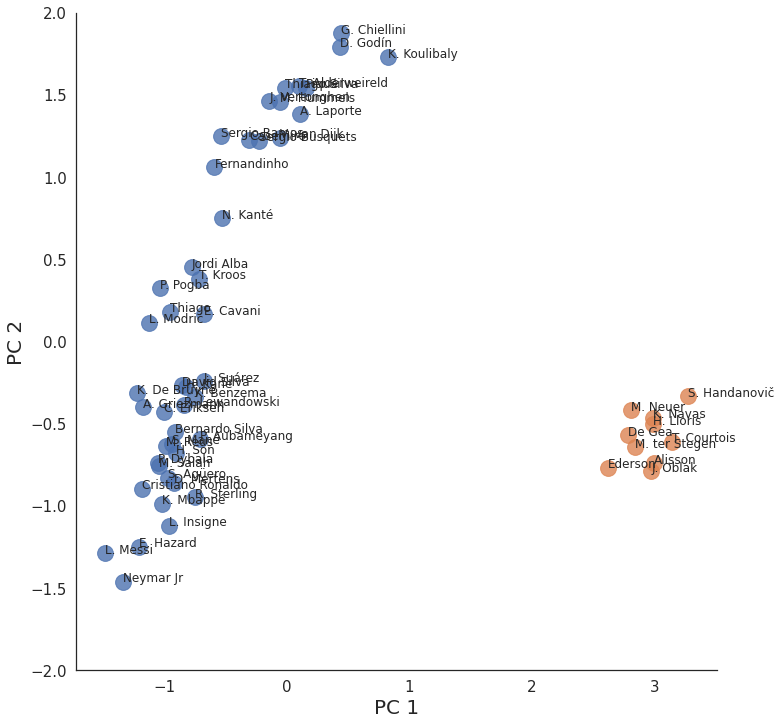

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 10, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

### Find an Optimal Epsilon Using Nearest Neighbors

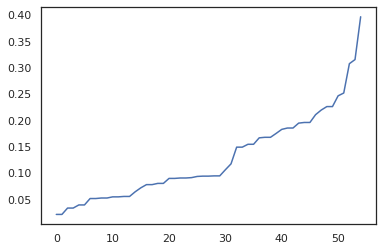

In [21]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor

nbrs = nn.fit(reduced[['x','y']])

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced[['x','y']])

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### Apply DBSCAN again with a New Eps

In [23]:
from sklearn.cluster import DBSCAN

# train the model using DBSCAN
db= DBSCAN(eps=0.3, min_samples=4)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced[['x','y']])

reduced['cluster'] = db_clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.482137,-1.287998,0,L. Messi
1,-1.180190,-0.894344,0,Cristiano Ronaldo
2,-1.335542,-1.460300,0,Neymar Jr
3,2.974839,-0.789651,1,J. Oblak
4,-1.207091,-1.249757,0,E. Hazard


### Replot

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


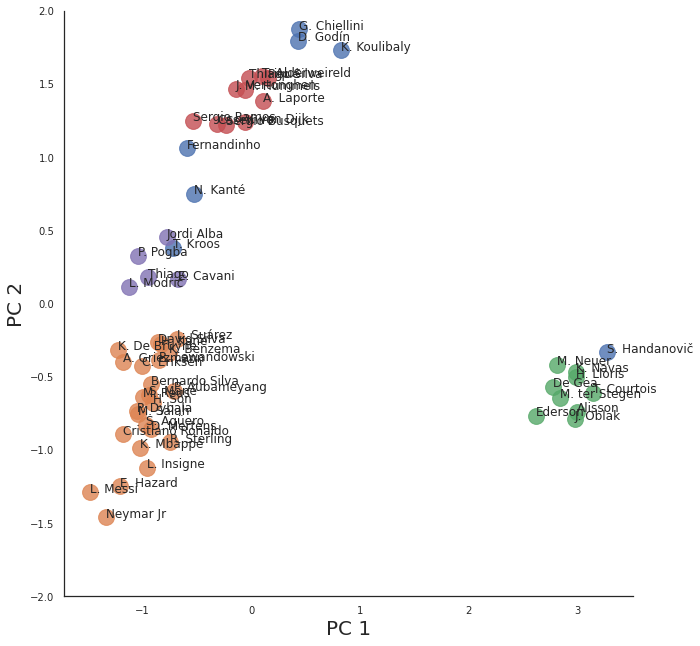

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, size = 9, scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()